In [29]:
# Import pustaka dasar untuk analisis data
import pandas as pd
import numpy as np

# Import pustaka untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Import pustaka dari Scikit-learn untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Mengatur agar plot ditampilkan langsung di notebook
%matplotlib inline

# Mengatur style plot agar lebih menarik
sns.set(style="whitegrid")


In [30]:
import pandas as pd
import numpy as np # Ditambahkan numpy untuk demonstrasi

# === CELL 2 — LOAD DATASET ===

df = pd.read_csv("dataset_ispa.csv")  # sesuaikan path bila perlu

print("5 Data Teratas:")
display(df.head())

print("\nInformasi Dataset:")
print(df.info())

print("\nRingkasan Statistik:")
display(df.describe())

5 Data Teratas:


,Umur,Batuk_Kering,Batuk_Berdahak,Demam,Pilek,Hidung_Tersumbat,Sesak_Napas,Nyeri_Tenggorokan,Sakit_Kepala,Mual_Muntah,Nyeri_Dada,Suara_Serak,Kelelahan,Berkeringat_Malam,Nafsu_Makan_Turun,Hilang_Penciuman,Nyeri_Saat_Menelan,Diagnosis
0,41,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,Sinusitis
1,52,1,0,1,1,1,0,0,0,1,0,0,1,1,1,0,0,Demam Biasa
2,15,1,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,Asma
3,27,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,Asma
4,70,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,Demam Biasa



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Umur                2000 non-null   int64 
 1   Batuk_Kering        2000 non-null   int64 
 2   Batuk_Berdahak      2000 non-null   int64 
 3   Demam               2000 non-null   int64 
 4   Pilek               2000 non-null   int64 
 5   Hidung_Tersumbat    2000 non-null   int64 
 6   Sesak_Napas         2000 non-null   int64 
 7   Nyeri_Tenggorokan   2000 non-null   int64 
 8   Sakit_Kepala        2000 non-null   int64 
 9   Mual_Muntah         2000 non-null   int64 
 10  Nyeri_Dada          2000 non-null   int64 
 11  Suara_Serak         2000 non-null   int64 
 12  Kelelahan           2000 non-null   int64 
 13  Berkeringat_Malam   2000 non-null   int64 
 14  Nafsu_Makan_Turun   2000 non-null   int64 
 15  Hilang_Penciuman    2000 non-null   int64 
 16  Nyer

,Umur,Batuk_Kering,Batuk_Berdahak,Demam,Pilek,Hidung_Tersumbat,Sesak_Napas,Nyeri_Tenggorokan,Sakit_Kepala,Mual_Muntah,Nyeri_Dada,Suara_Serak,Kelelahan,Berkeringat_Malam,Nafsu_Makan_Turun,Hilang_Penciuman,Nyeri_Saat_Menelan
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,40.922000,0.578500,0.510000,0.697500,0.611500,0.516500,0.299500,0.602500,0.480000,0.311500,0.393500,0.401500,0.599500,0.309000,0.516000,0.147500,0.414000
std,23.430822,0.493923,0.500025,0.459455,0.487531,0.499853,0.458154,0.489503,0.499725,0.463222,0.488648,0.490324,0.490122,0.462197,0.499869,0.354692,0.492672
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data berhasil dimuat.
Peringatan: Kolom 'batuk berdahak' tidak ditemukan dalam data.
Peringatan: Kolom 'sakit kepala' tidak ditemukan dalam data.
Peringatan: Kolom 'suara-serak' tidak ditemukan dalam data.
Peringatan: Kolom 'nyeri saat menelan' tidak ditemukan dalam data.

Jumlah data duplikat sebelum dibersihkan: 2
Jumlah data duplikat setelah dibersihkan: 0


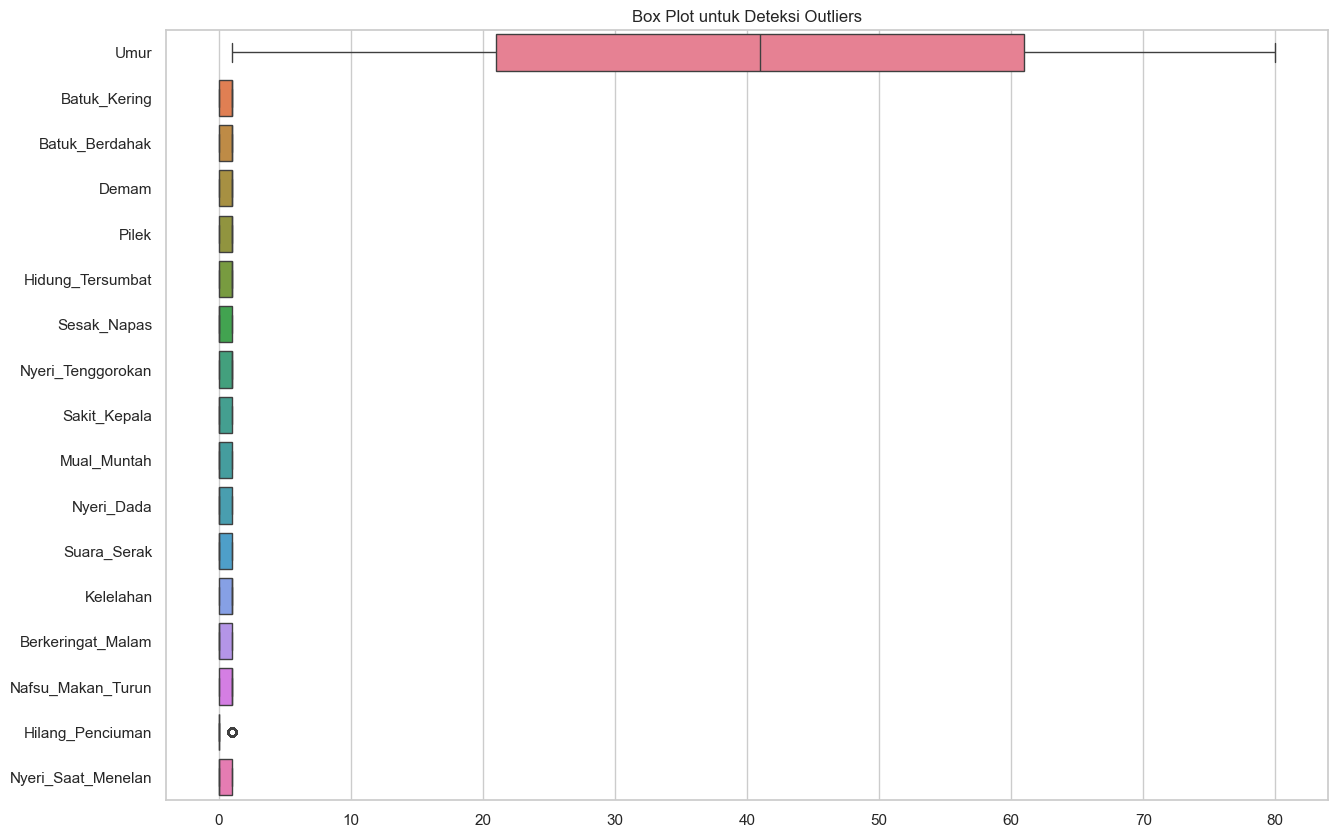


Deskripsi Statistik Data Setelah Pembersihan:
              Umur  Batuk_Kering  Batuk_Berdahak        Demam        Pilek  \
count  1998.000000   1998.000000     1998.000000  1998.000000  1998.000000   
mean     40.920921      0.578078        0.510010     0.697698     0.611612   
std      23.441993      0.493990        0.500025     0.459370     0.487506   
min       1.000000      0.000000        0.000000     0.000000     0.000000   
25%      21.000000      0.000000        0.000000     0.000000     0.000000   
50%      41.000000      1.000000        1.000000     1.000000     1.000000   
75%      61.000000      1.000000        1.000000     1.000000     1.000000   
max      80.000000      1.000000        1.000000     1.000000     1.000000   

       Hidung_Tersumbat  Sesak_Napas  Nyeri_Tenggorokan  Sakit_Kepala  \
count       1998.000000  1998.000000        1998.000000   1998.000000   
mean           0.516517     0.299800           0.602102      0.479980   
std            0.499852     0.4

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# PERBAIKAN UTAMA: Muat data Anda ke dalam variabel 'data'
# Ganti 'data_mentah.csv' dengan nama file data Anda yang sebenarnya
try:
    data = pd.read_csv("dataset_ispa.csv")
    print("Data berhasil dimuat.")
except FileNotFoundError:
    print("ERROR: File 'data_mentah.csv' tidak ditemukan. Pastikan nama file dan path sudah benar.")
    # Keluar atau tangani error
    # return
# ==============================================================================


# Kolom yang tidak mungkin memiliki nilai 0
cols_with_zeros = ['batuk berdahak','sakit kepala','suara-serak','nyeri saat menelan']

# Ganti nilai 0 dengan NaN (Not a Number) agar lebih mudah dihitung
for col in cols_with_zeros:
    # PERHATIAN: Pastikan kolom benar-benar ada di DataFrame Anda, jika tidak akan terjadi KeyError
    if col in data.columns:
        data[col] = data[col].replace(0, np.nan)
    else:
        print(f"Peringatan: Kolom '{col}' tidak ditemukan dalam data.")


# Isi nilai NaN dengan nilai rata-rata (mean) dari masing-masing kolom
for col in cols_with_zeros:
    if col in data.columns:
        data[col].fillna(data[col].mean(), inplace=True)

# 2. Penanganan Data Duplikat
print(f"\nJumlah data duplikat sebelum dibersihkan: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)
print(f"Jumlah data duplikat setelah dibersihkan: {data.duplicated().sum()}")

# 3. Penanganan Outliers (Visualisasi)
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient='h')
plt.title('Box Plot untuk Deteksi Outliers')
plt.show()

# Menampilkan deskripsi statistik setelah pembersihan
print("\nDeskripsi Statistik Data Setelah Pembersihan:")
print(data.describe())

✅ Kolom target ditemukan: 'Diagnosis'

🔄 Mencoba konversi semua kolom (kecuali kolom target) menjadi numerik...
Visualisasi Target: Countplot (Kategorikal/Diskrit)


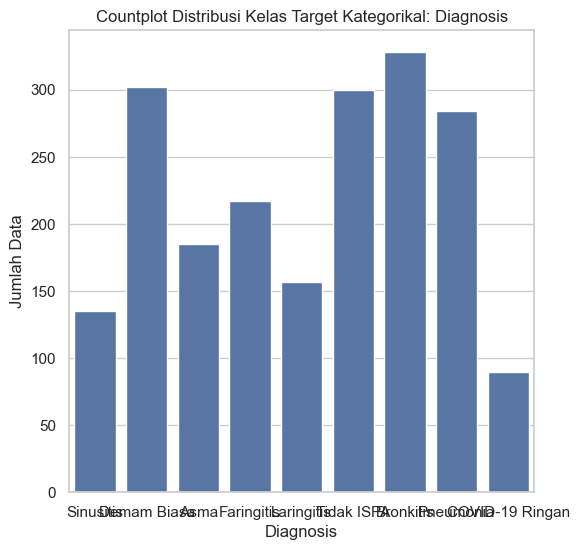


🔬 Jumlah Kolom Fitur Numerik yang akan di-histogram: 17


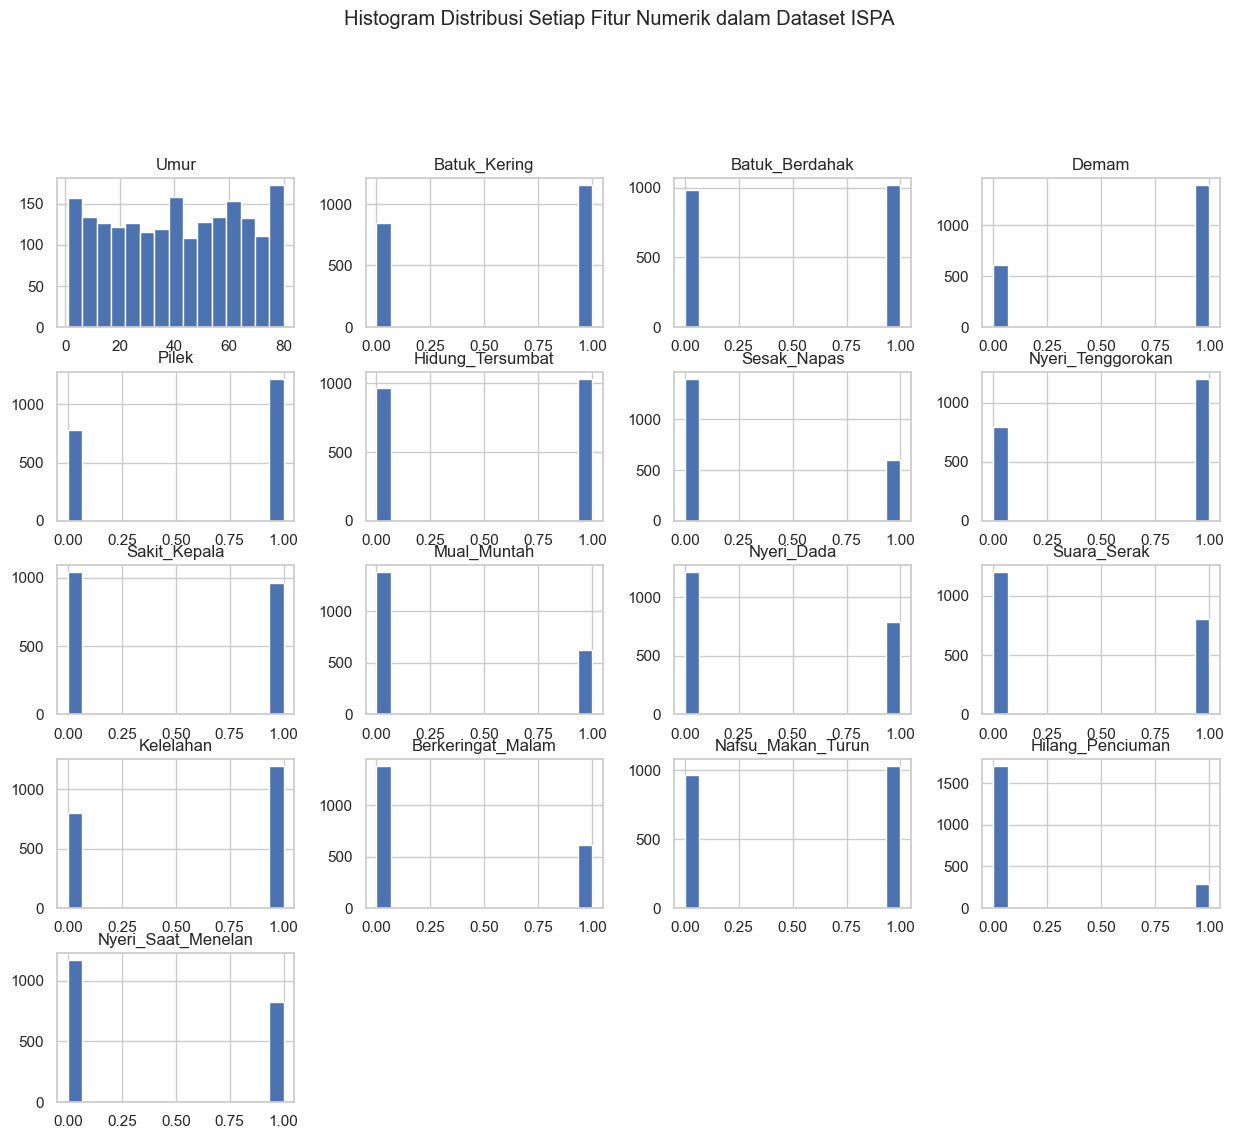

In [32]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Diperlukan untuk pengecekan tipe data yang lebih baik

# Asumsi: DataFrame bernama 'data' sudah dimuat sebelumnya

# --- FASE 1: Penentuan Kolom Target ---
target_column = None
possible_targets = ['Outcome', 'outcome', 'diagnosa', 'Diagnosis', 'target', 'kategori', 'kategori ispa']

for col in possible_targets:
    if col in data.columns:
        target_column = col
        print(f"✅ Kolom target ditemukan: '{target_column}'")
        break

# Jika tidak ada yang cocok, gunakan kolom terakhir
if target_column is None:
    target_column = data.columns[-1]
    print(f"⚠️ Tidak ditemukan kolom target yang umum, menggunakan kolom terakhir: '{target_column}'")

# --- FASE 2: Konversi Tipe Data Numerik (Penting untuk mengatasi error sebelumnya) ---
print("\n🔄 Mencoba konversi semua kolom (kecuali kolom target) menjadi numerik...")
# Coba konversi semua kolom fitur ke numerik. 
# errors='coerce' akan mengganti nilai non-numerik menjadi NaN.
for col in data.columns:
    if col != target_column:
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce')
        except:
            # Lewati jika konversi gagal total
            continue

# --- FASE 3: Visualisasi Distribusi Target (Menggunakan Countplot atau Histogram) ---
plt.figure(figsize=(6, 6))

# Cek apakah kolom target bersifat Numerik atau Kategorikal/Object
if np.issubdtype(data[target_column].dtype, np.number):
    # Jika target numerik, gunakan histogram
    plt.hist(data[target_column].dropna(), bins=15, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram Distribusi Kelas Target Numerik: {target_column}")
    plt.ylabel("Frekuensi")
    print(f"Visualisasi Target: Histogram (Numerik)")
else:
    # Jika target Kategorikal/Object, gunakan countplot (visualisasi yang paling mendekati 'histogram' untuk data diskrit/kategori)
    sns.countplot(x=target_column, data=data)
    plt.title(f"Countplot Distribusi Kelas Target Kategorikal: {target_column}")
    plt.ylabel("Jumlah Data")
    print(f"Visualisasi Target: Countplot (Kategorikal/Diskrit)")

plt.xlabel(target_column)
plt.show()

# --- FASE 4: Visualisasi Distribusi Setiap Fitur Numerik Menggunakan Histogram ---
# Memilih HANYA kolom-kolom dengan tipe data numerik (setelah konversi)
numerical_data = data.select_dtypes(include=['number'])

# Hapus kolom target dari fitur numerik (jika targetnya adalah angka)
if target_column in numerical_data.columns:
    numerical_data = numerical_data.drop(columns=[target_column])

print(f"\n🔬 Jumlah Kolom Fitur Numerik yang akan di-histogram: {numerical_data.shape[1]}")

if not numerical_data.empty:
    # Menggunakan metode .hist() dari Pandas untuk membuat grid histogram
    numerical_data.hist(figsize=(15, 12), bins=15)
    plt.suptitle("Histogram Distribusi Setiap Fitur Numerik dalam Dataset ISPA", y=1.02)
    plt.show()
else:
    print("❌ Setelah konversi dan pembersihan, tidak ditemukan kolom fitur numerik untuk membuat histogram.")

In [33]:
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split
import pandas as pd # Tambahkan jika belum diimpor

# --- FASE 1: Pemisahan Fitur (X) dan Target (y) ---
# Asumsi: 'data' DataFrame dan 'target_column' sudah terdefinisi
X = data.drop(columns=[target_column])
y = data[target_column]

# --- FASE 2: Perbaikan Data Target (Mengatasi Error Stratify) ---
# 1. Hitung frekuensi setiap kelas
class_counts = y.value_counts()

# 2. Identifikasi kelas yang hanya memiliki 1 anggota
classes_to_remove = class_counts[class_counts < 2].index

if not classes_to_remove.empty:
    print(f"⚠️ Ditemukan kelas target dengan sampel tunggal yang akan dihapus: {classes_to_remove.tolist()}")
    
    # 3. Buat mask (filter) untuk menyimpan baris yang BUKAN kelas tunggal
    # "~" adalah operator NOT
    rows_to_keep = ~y.isin(classes_to_remove)
    
    # Perbarui X dan y
    X = X[rows_to_keep]
    y = y[rows_to_keep]
    
    print(f"Jumlah baris setelah dibersihkan: {len(X)}")
else:
    print("✅ Tidak ada kelas target dengan sampel tunggal. Data siap diproses.")


# --- FASE 3: Bagi data menjadi data latih dan data uji (Dengan Stratify) ---
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Sekarang stratify=y seharusnya berfungsi
)

print("\n✅ Data telah berhasil dibagi!")
print(f"Bentuk data fitur latih : {X_train.shape}")
print(f"Bentuk data fitur uji : {X_test.shape}")

✅ Tidak ada kelas target dengan sampel tunggal. Data siap diproses.

✅ Data telah berhasil dibagi!
Bentuk data fitur latih : (1598, 17)
Bentuk data fitur uji : (400, 17)


In [34]:
# Import library
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# Import SVC untuk memastikan best_svc_model dapat diinisialisasi jika belum ada

# --- 1. Penskalaan (Scaling) Data ---
print("Memulai Penskalaan Data...")
scaler = StandardScaler()

# Scaler di-FIT dan di-TRANSFORM HANYA pada data latih (X_train)
X_train_scaled = scaler.fit_transform(X_train)
print("✅ X_train_scaled berhasil dibuat.")

# Scaler di-TRANSFORM pada data uji (X_test) menggunakan statistik dari data latih
X_test_scaled = scaler.transform(X_test)
print("✅ X_test_scaled berhasil dibuat.")

# -----------------------------------------------------------
# 2. Pelatihan Model Terbaik (SVC)
# Asumsi: best_svc_model sudah berisi parameter terbaik dari GridSearch sebelumnya.
# Jika belum, inisialisasi dengan parameter terbaik yang ditemukan (contoh: C=10, gamma='rbf', dst.)
# -----------------------------------------------------------

# Contoh inisialisasi model terbaik (Ganti nilai C, gamma, dan kernel sesuai hasil tuning Anda)
# Jika best_svc_model sudah didefinisikan dari GridSearch, baris ini bisa dilewati.
try:
    if 'best_svc_model' not in locals():
         # Inisialisasi default jika model terbaik belum ada
         best_svc_model = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
except NameError:
    # Inisialisasi jika benar-benar belum ada
    best_svc_model = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)


print("\nMemulai Pelatihan Model SVm Terbaik...")
# Pelatihan Model menggunakan data latih yang sudah di-scale
best_svc_model.fit(X_train_scaled, y_train)
print("✅ Pelatihan Model Selesai. Model siap digunakan untuk prediksi dan evaluasi.")

Memulai Penskalaan Data...
✅ X_train_scaled berhasil dibuat.
✅ X_test_scaled berhasil dibuat.

Memulai Pelatihan Model SVm Terbaik...
✅ Pelatihan Model Selesai. Model siap digunakan untuk prediksi dan evaluasi.


✅ Prediksi pada data uji selesai.

--- Hasil Evaluasi Kinerja Model SVM Terbaik ---
1. Akurasi Model SVM Terbaik (pada Data Uji): 89.25%

2. Classification Report:
                 precision    recall  f1-score   support

           Asma       0.97      0.95      0.96        37
      Bronkitis       0.92      0.88      0.90        66
COVID-19 Ringan       0.00      0.00      0.00        18
    Demam Biasa       0.96      0.90      0.93        61
     Faringitis       0.93      0.98      0.95        43
     Laringitis       0.94      0.97      0.95        31
      Pneumonia       0.93      0.95      0.94        57
      Sinusitis       0.96      1.00      0.98        27
     Tidak ISPA       1.00      0.93      0.97        60

       accuracy                           0.89       400
      macro avg       0.85      0.84      0.84       400
   weighted avg       0.91      0.89      0.90       400


3. Visualisasi Confusion Matrix (SVM):


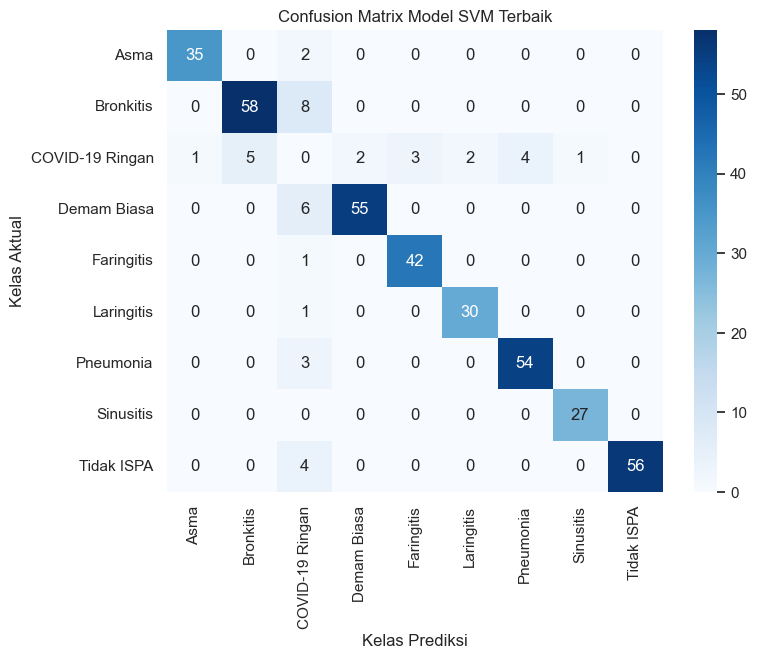

In [35]:
# Import library
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- ASUMSI: best_svc_model, X_test_scaled, dan y_test sudah tersedia dari langkah sebelumnya ---

# 1. Prediksi
y_pred_tuned_svm = best_svc_model.predict(X_test_scaled)
print("✅ Prediksi pada data uji selesai.")

# -----------------------------------------------------------
# 2. Perhitungan Metrik Kinerja
# -----------------------------------------------------------

print("\n--- Hasil Evaluasi Kinerja Model SVM Terbaik ---")

# A. Akurasi (ditampilkan dalam persen)
accuracy_tuned_svm = accuracy_score(y_test, y_pred_tuned_svm) * 100
print(f"1. Akurasi Model SVM Terbaik (pada Data Uji): {accuracy_tuned_svm:.2f}%")

# B. Classification Report
print("\n2. Classification Report:")
try:
    print(classification_report(y_test, y_pred_tuned_svm, target_names=target_names, zero_division=0))
except NameError:
    print(classification_report(y_test, y_pred_tuned_svm, zero_division=0))

# C. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned_svm)

# -----------------------------------------------------------
# 3. Visualisasi Confusion Matrix
# -----------------------------------------------------------

print("\n3. Visualisasi Confusion Matrix (SVM):")

try:
    class_labels = target_names
except NameError:
    class_labels = sorted(list(set(y_test)))

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels
)
plt.title('Confusion Matrix Model SVM Terbaik')
plt.xlabel('Kelas Prediksi')
plt.ylabel('Kelas Aktual')
plt.show()


In [36]:
# Import library
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# --- ASUMSI: X_train_scaled, y_train, X_test_scaled, y_test sudah tersedia ---

# 1. Hyperparameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# 2. GridSearchCV
grid = GridSearchCV(
    estimator=SVC(random_state=42), 
    param_grid=param_grid, 
    refit=True,
    verbose=2, 
    cv=5,
    scoring='accuracy'
)

print("\n--- Memulai Pencarian Hyperparameter Terbaik (GridSearchCV) ---")
grid.fit(X_train_scaled, y_train)
print("✅ GridSearchCV selesai.")

# -----------------------------------------------------------
# 3. Hasil Tuning (Tampilan tanpa dictionary)
# -----------------------------------------------------------

best_params = grid.best_params_
best_score = grid.best_score_ * 100  # ubah jadi persen
best_model = grid.best_estimator_

print("\n--- Hasil Tuning SVM ---")
print(f"C terbaik       : {best_params['C']}")
print(f"Kernel terbaik  : {best_params['kernel']}")
print(f"Gamma terbaik   : {best_params['gamma']}")
print(f"Akurasi CV      : {best_score:.2f}%")

# -----------------------------------------------------------
# 4. Evaluasi Model Terbaik
# -----------------------------------------------------------

tuned_predictions = best_model.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, tuned_predictions) * 100  # persen

print("\n--- Evaluasi Akhir SVM ---")
print(f"Akurasi Uji     : {tuned_accuracy:.2f}%")



--- Memulai Pencarian Hyperparameter Terbaik (GridSearchCV) ---
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; t

Dataset berhasil dimuat!
   Umur  Batuk_Kering  Batuk_Berdahak  Demam  Pilek  Hidung_Tersumbat  \
0    41             1               0      0      1                 1   
1    52             1               0      1      1                 1   
2    15             1               0      1      1                 0   
3    27             1               0      0      0                 0   
4    70             0               0      1      1                 0   

   Sesak_Napas  Nyeri_Tenggorokan  Sakit_Kepala  Mual_Muntah  Nyeri_Dada  \
0            0                  0             0            0           0   
1            0                  0             0            1           0   
2            1                  1             0            0           1   
3            1                  0             0            0           1   
4            0                  0             1            0           1   

   Suara_Serak  Kelelahan  Berkeringat_Malam  Nafsu_Makan_Turun  \
0           

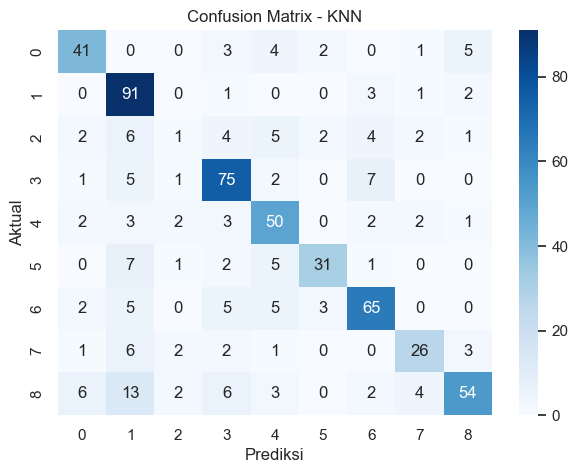

In [37]:
# ===============================================================
# 1. Import pustaka yang dibutuhkan
# ===============================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================================================
# 2. MEMUAT DATASET ANDA (GANTI SESUAI FILE ANDA)
# ===============================================================

# Ganti dengan lokasi file dataset Anda
df = pd.read_csv("dataset_ispa.csv")  # <--- GANTI NAMA FILE DI SINI
print("Dataset berhasil dimuat!")
print(df.head())

# ===============================================================
# 3. PERSIAPAN DATA
# ===============================================================

# a. Pisahkan fitur (X) dan target (y)
print("\nNama Kolom Dataset:")
print(df.columns.tolist())

# b. Pembagian data train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# c. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================================================
# 4. TRAINING MODEL KNN
# ===============================================================

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

print("\nModel KNN (k=5) berhasil dilatih!")

# ===============================================================
# 5. PREDIKSI DAN EVALUASI
# ===============================================================

y_pred = knn_model.predict(X_test_scaled)

print("\n=== Hasil Evaluasi Model KNN ===")
akurasi = accuracy_score(y_test, y_pred) * 100
print(f"Akurasi: {akurasi:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# ===============================================================
# 6. CONFUSION MATRIX
# ===============================================================

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


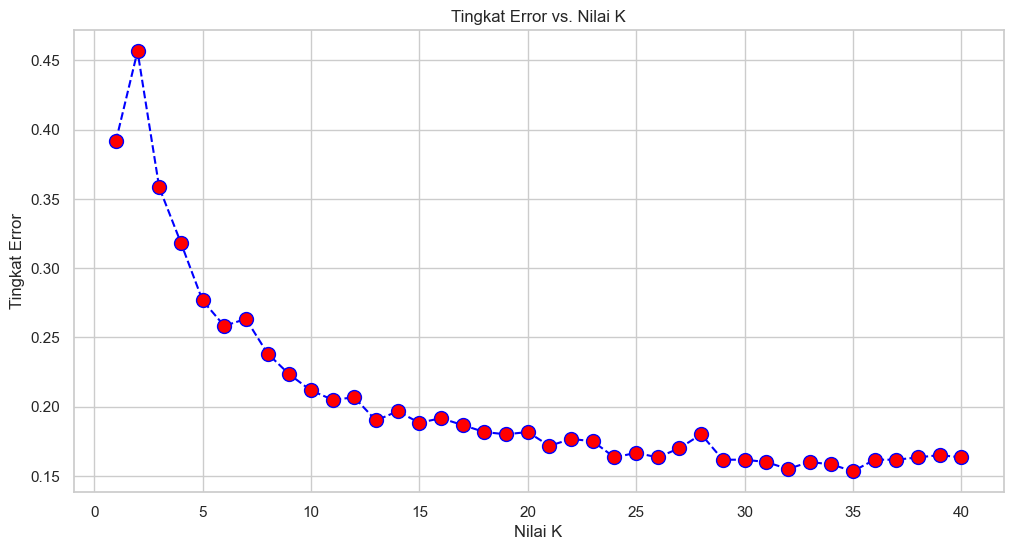

In [38]:
# List untuk menyimpan tingkat error untuk setiap nilai k
error_rate = []

# Mencoba nilai k dari 1 sampai 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    # Menghitung error (1 - akurasi) dan menambahkannya ke list
    error_rate.append(np.mean(pred_i != y_test))

# Membuat plot untuk visualisasi
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tingkat Error vs. Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Tingkat Error')
plt.grid(True)
plt.show()

In [39]:
# Membuat model KNN baru dengan nilai k terbaik yang kita temukan
knn_optimal = KNeighborsClassifier(n_neighbors=23)

# Melatih ulang model
knn_optimal.fit(X_train_scaled, y_train)

# Membuat prediksi baru
y_pred_optimal = knn_optimal.predict(X_test_scaled)

# Evaluasi akhir
print("--- Hasil Evaluasi Setelah Tuning (k=23) ---")
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Akurasi Optimal: {accuracy_optimal * 100:.2f}%")
print("Laporan Klasifikasi Optimal:")
print(classification_report(y_test, y_pred_optimal))


--- Hasil Evaluasi Setelah Tuning (k=23) ---
Akurasi Optimal: 82.50%
Laporan Klasifikasi Optimal:
                 precision    recall  f1-score   support

           Asma       0.90      0.93      0.91        56
      Bronkitis       0.72      0.98      0.83        98
COVID-19 Ringan       0.00      0.00      0.00        27
    Demam Biasa       0.78      0.91      0.84        91
     Faringitis       0.84      0.82      0.83        65
     Laringitis       0.92      0.77      0.84        47
      Pneumonia       0.87      0.92      0.89        85
      Sinusitis       0.89      0.78      0.83        41
     Tidak ISPA       0.89      0.72      0.80        90

       accuracy                           0.82       600
      macro avg       0.76      0.76      0.75       600
   weighted avg       0.80      0.82      0.81       600



In [40]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas as pd

# ============================
# 1. Siapkan / cek model SVM
# ============================

try:
    svm_model = best_model
except NameError:
    try:
        svm_model = best_svc_model
    except NameError:
        print("⚠️ Model SVM belum ada, melatih ulang...")
        svm_model = SVC(kernel='rbf', C=10, gamma='scale')
        svm_model.fit(X_train_scaled, y_train)

# ============================
# 2. Siapkan / cek model KNN
# ============================

try:
    knn = knn_model
except NameError:
    print("⚠️ Model KNN belum ada, melatih ulang...")
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)

# ============================
# 3. Prediksi
# ============================

svm_pred = svm_model.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)

svm_acc = accuracy_score(y_test, svm_pred) * 100
knn_acc = accuracy_score(y_test, knn_pred) * 100

# ============================
# 4. Tabel Perbandingan
# ============================

hasil_perbandingan = pd.DataFrame({
    "Algoritma": ["SVM", "KNN"],
    "Akurasi (%)": [svm_acc, knn_acc]
})

print("\n=== PERBANDINGAN MODEL ===")
print(hasil_perbandingan)

# ============================
# 5. Model Terbaik
# ============================

if svm_acc > knn_acc:
    print("\n✅ Model terbaik: SVM")
elif knn_acc > svm_acc:
    print("\n✅ Model terbaik: KNN")
else:
    print("\n⚖️ Kedua model seimbang")



=== PERBANDINGAN MODEL ===
  Algoritma  Akurasi (%)
0       SVM    95.500000
1       KNN    72.333333

✅ Model terbaik: SVM


In [41]:
import joblib

# pilih model terbaik otomatis
final_model = svm_model  # dari perbandingan sebelumnya

joblib.dump(final_model, "model_ispa.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model & scaler berhasil disimpan")


✅ Model & scaler berhasil disimpan
